# Loading Data
- The dataset is composed of a combination of 6819 observations per each of our 96 features.
- All of the features are numerical (int64 or float64)
- There are no missing values (NaN) among the data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")
import os
# "/Users/DaynoJa/Desktop/BankruptData/archive/data.csv"


In [2]:
data = pd.read_csv("/Users/DaynoJa/Desktop/BankruptData/archive/data.csv")
import numpy as np
np.any(data.dtypes==object)

False

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
np.any(data.isnull())
#Checking for null values

False

## Removing Outliers
- Increase Model Accuracy

In [5]:
outliers = data.columns.drop('Bankrupt?')

In [6]:
def remove_outliers(data):
    Q1 = data.quantile(0.10) #25th quantile of the column
    Q3 = data.quantile(0.90) #75th quantile of the column
    IQR = Q3 - Q1 #The difference between the 75th quantile and the 25th quantile of the column
    
    data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)] #Find all the datapoints in the column which are less than its 25th quantile and greater than its 75th quantile and remove them
    
    return data_clean #Return the data which has no outliers

In [7]:
data[outliers] = remove_outliers(data[outliers])
#used the function 'remove_outliers' to clean the data for the columns specified in 'outliers', which is all the columns except the 'Bankrupt?' column
data.shape
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.30335,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.30351,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1.0,0.029890
6815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6817,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(inplace=True)
data.shape
#The function changed all outliers to null values lets remove them

(3226, 96)

In [9]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

 ## Scaling Data

In [10]:
from sklearn.preprocessing import StandardScaler
import mlflow
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
mlflow.sklearn.autolog()
#doesnt log anything yet

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_ = pca.fit_transform(X_)

2021/02/23 12:11:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e1de9c66ed8412fbb0e5aa2f332a90f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/02/23 12:11:36 WARNING mlflow.sklearn: PCA.score failed. The 'training_score' metric will not be recorded. Scoring error: 'y'
2021/02/23 12:11:36 WARNING mlflow.sklearn: Failed to infer model signature: could not sample data to infer model signature: 'y'


In [12]:
X = pd.DataFrame(X_, columns=X.columns)

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

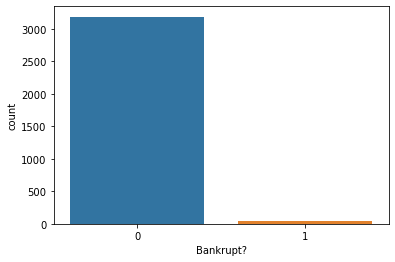

In [13]:
import seaborn as sns
sns.countplot(y)

2021/02/23 12:11:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b5d34563df8344388c905d65cff9c398', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/02/23 12:11:45 WARNING mlflow.sklearn: Failed to infer model signature: could not sample data to infer model signature: 'y'


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

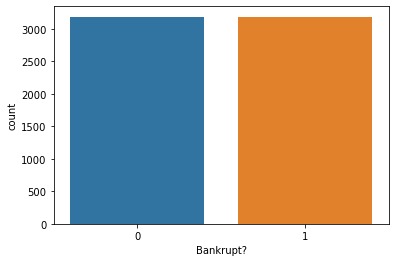

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=56)
X, y = smote.fit_resample(X, y)
sns.countplot(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [16]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

In [24]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# import xgboost
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [25]:
import mlflow
import mlflow.sklearn
import mlflow.pyfunc
from mlflow.models.signature import infer_signature

#ExtraTreesClassifier
    
mlflow.end_run()
with mlflow.start_run(run_name = 'extra_trees'):
  model = ExtraTreesClassifier()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  #f_n --> when actual is postive but model predicted negative
  #f_p --> when actual is negative but model predicted positive
  #1 True for Overfitting
  
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.sklearn.log_model(model, "extra_trees_model")
  
print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 1.0


Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



Train Score: 1.0


Validation Score: 1.0


Is over fitting: False


Difference between the scores: 0.0


In [26]:
#GradientBoostingClassifier
    
mlflow.end_run()
with mlflow.start_run(run_name = 'gradient_boost'):
  model = GradientBoostingClassifier()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.sklearn.log_model(model, "gradient_boost_model")
  
print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 0.9818529130850048


Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98       504
           1       0.97      1.00      0.98       516

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



Train Score: 0.9992645256190242


Validation Score: 0.9813725490196078


Is over fitting: True


Difference between the scores: 1.7891976599416495


In [27]:
#RandomForestClassifier
    
mlflow.end_run()
with mlflow.start_run(run_name = 'random_forest'):
  model = RandomForestClassifier()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.sklearn.log_model(model, "random_forest_model")
  

print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 0.9970958373668926


Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



Train Score: 1.0


Validation Score: 0.9813725490196078


Is over fitting: True


Difference between the scores: 1.8627450980392268


In [28]:
#LogisticRegression
    
mlflow.end_run()
with mlflow.start_run(run_name = 'logis_reg'):
  model = LogisticRegression()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.sklearn.log_model(model, "logis_reg_model")
  
print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 0.9791271347248577


Report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98       504
           1       0.96      1.00      0.98       516

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



Train Score: 0.9776906104437362


Validation Score: 0.9784313725490196


Is over fitting: False


Difference between the scores: -0.07407621052834656


In [29]:
#DecisionTreeClassifier

mlflow.end_run()
with mlflow.start_run(run_name = 'decision_tree'):
  model = DecisionTreeClassifier()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.sklearn.log_model(model, "decision_tree_model")
  
print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 0.9770114942528736


Report:               precision    recall  f1-score   support

           0       0.99      0.96      0.98       504
           1       0.97      0.99      0.98       516

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



Train Score: 1.0


Validation Score: 0.9764705882352941


Is over fitting: True


Difference between the scores: 2.352941176470594


In [30]:
#LGBMClassifier
import mlflow.lightgbm

mlflow.end_run()
with mlflow.start_run(run_name = 'LGBM'):
  model = LGBMClassifier()
  model.fit(x_train_, y_train_)
    
  pred = model.predict(x_val)
    
  f1score = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)
  cmatrix = confusion_matrix(y_val,pred)
  
  mlflow.log_metric('f1_score',f1score)
  mlflow.log_metric('train_score',train_score)
  mlflow.log_metric('val_score',val_score)
  
  t_n, f_p, f_n, t_p = cmatrix.ravel()
  mlflow.log_metric("true_neg",t_n)
  mlflow.log_metric("false_pos",f_p)
  mlflow.log_metric("false_neg",f_n)
  mlflow.log_metric("true_pos",t_p)
  mlflow.log_metric("Overfitting", 1 if train_score > val_score else 0)
  
  mlflow.lightgbm.autolog(model,"LGBM_model",log_models=True)

print('F1 Score:', f1score)
print('\n')
print('Report:', report)
print('\n')
print('Train Score:',train_score)
print('\n')
print('Validation Score:', val_score)
print('\n')
print('Is over fitting:', True if train_score>val_score else False)
print('\n')
print('Difference between the scores:', train_score*100 - val_score*100) #as percentage

F1 Score: 0.9923076923076923


Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       504
           1       0.98      1.00      0.99       516

    accuracy                           0.99      1020
   macro avg       0.99      0.99      0.99      1020
weighted avg       0.99      0.99      0.99      1020



Train Score: 1.0


Validation Score: 0.9921568627450981


Is over fitting: True


Difference between the scores: 0.7843137254901933


In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred


2021/02/23 13:08:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c22c8b63fae94df2a3903cbfc9455b4c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
np.unique(pred)

array([0, 1], dtype=int64)

In [33]:
f1 = f1_score(y_test, pred)
f1*100

97.20332577475435

In [34]:
report = classification_report(y_test, pred)
print('Report:',report)

Report:               precision    recall  f1-score   support

           0       1.00      0.94      0.97       632
           1       0.95      1.00      0.97       643

    accuracy                           0.97      1275
   macro avg       0.97      0.97      0.97      1275
weighted avg       0.97      0.97      0.97      1275



In [35]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, pred)
AUC*100

97.07278481012659

In [36]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print('Train Score:', train_score*100)
print('Test Score:', test_score*100)

print('Overfitting by:', train_score*100-test_score*100)

Train Score: 97.90154932339674
Test Score: 97.09803921568627
Overfitting by: 0.8035101077104656
